# Data loader

created with windsurf cascade


In [1]:
from dataclasses import dataclass
from typing import List, Tuple
import re

@dataclass
class Hailstone:
    p: Tuple[int, int]
    v: Tuple[int, int]

def load_hailstones(filename: str) -> List[Hailstone]:
    hailstones = []
    with open(filename, 'r') as f:
        for line in f:
            # Parse using regex to extract the numbers
            numbers = [int(x) for x in re.findall(r'-?\d+', line)]
            hailstone = Hailstone(
                p=(numbers[0], numbers[1]),
                v=(numbers[2], numbers[3])
            )
            hailstones.append(hailstone)
    return hailstones
hailstones = load_hailstones('14.txt')

# For test data
# height = 7
# width = 11

#for prod data
height = 103
width = 101



# Part 1
Done with infill AI help

In [2]:
from math import prod, floor


def test_turn(count, hailstones):
    newPositions = []
    for hailstone in hailstones:
        newX = (hailstone.p[0] + (hailstone.v[0] * count)) % width
        newY = (hailstone.p[1] + (hailstone.v[1] * count)) % height
        newPositions.append((newX, newY))
    return newPositions
newPositions = test_turn(100, hailstones)
# for hailstone in hailstones:
#     newX = (hailstone.p[0] + (hailstone.v[0] * 100)) % width
#     newY = (hailstone.p[1] + (hailstone.v[1] * 100)) % height
#     newPositions.append((newX, newY))
# print(newPositions)
# score = 0
x_midline = floor(width / 2)
y_midline = floor(height / 2)
# print("midlines", x_midline, y_midline)

def get_score(positions):
    quadrants = [0, 0,0,0]
    for position in positions:
        # quadrant = 0
        # print(position)
    
        
        if(position[0] < x_midline and position[1] < y_midline):
            quadrants[0] += 1
        elif(position[0] < x_midline and position[1] > y_midline):
            quadrants[2] += 1
        elif(position[0] > x_midline and position[1] < y_midline):
            quadrants[1] += 1
        elif(position[0] > x_midline and position[1] > y_midline):
            quadrants[3] += 1
        # else:
            # print("On the midline", position)
        # print(position, quadrant)
        # score += quadrant
    return prod(quadrants)

print(get_score(newPositions))

211773366


In [3]:

from time import sleep
from IPython.display import clear_output

from PIL import Image, ImageDraw, ImageFont


def print_grid(positions):
    for y in range(height):
        for x in range(width):
            # if(y == y_midline or x == x_midline):
            #     print(' ', end='')
            # else:
                score = len([p for p in positions if p[0] == x and p[1] == y])
                if score > 0:
                    print(score, end='')
                else:
                    print('.', end='')
        print()

def save_grid(positions):
    # make visualization using pillow
    image = Image.new('RGB', (width*2, height*2), (255, 255, 255))
    draw = ImageDraw.Draw(image)
    # font = ImageFont.truetype("arial.ttf", 12)
    for y in range(height):
        for x in range(width):
            score = len([p for p in positions if p[0] == x and p[1] == y])
            if score > 0:
                # draw a light pixel if this has a score, and a dark pixel if it doesn't    
                draw.rectangle((x*2, y*2, x*2 + 2, y*2 + 2), fill=(0,0,0))
    image.save('image.jpg')
    # save(image, 'image.jpg')
    # display(image)


def visualize_grid(positions):
    # make visualization using pillow
    image = Image.new('RGB', (width*2, height*2), (255, 255, 255))
    draw = ImageDraw.Draw(image)
    # font = ImageFont.truetype("arial.ttf", 12)
    for y in range(height):
        for x in range(width):
            score = len([p for p in positions if p[0] == x and p[1] == y])
            if score > 0:
                # draw a light pixel if this has a score, and a dark pixel if it doesn't    
                draw.rectangle((x*2, y*2, x*2 + 2, y*2 + 2), fill=(0,0,0))
    # image.save('image.jpg')
    # save(image, 'image.jpg')
    display(image)


# Approach using minimum safety score

Hand-crafted to see if it mattered (it did)

229192250 1


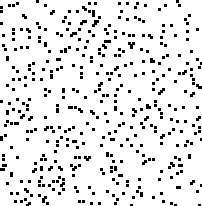

213785000 2


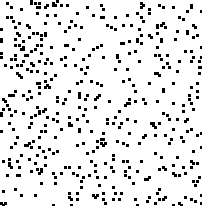

211236190 9


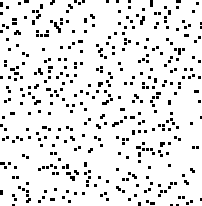

94824374 31


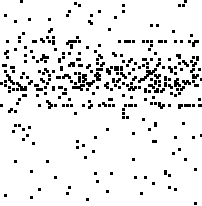

93671424 134


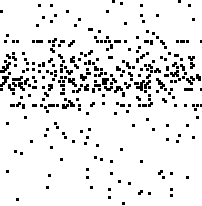

93562560 752


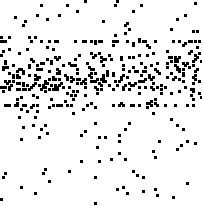

91814688 855


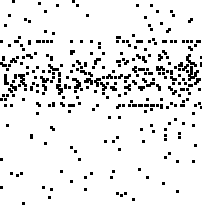

88756472 958


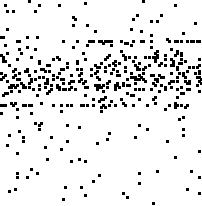

88616808 1164


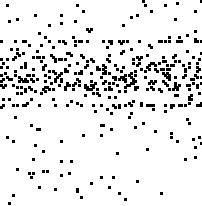

87912000 2091


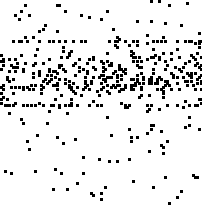

64788240 7344


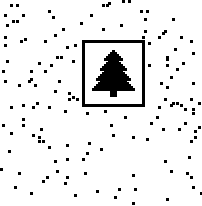

Found on turn 7344 with score 64788240


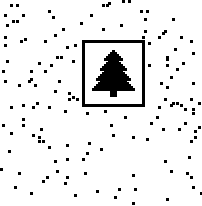

In [11]:
minscore = 9999999999999999999999999999999999
minpositions = []
minturn = 0
for turn in range(1, 100000):
    positions = test_turn(turn, hailstones)
    score = get_score(positions)
    # print(score, turn)
    # break;
    if(score < minscore):
        minscore = score
        minturn = turn
        minpositions = positions
        print(minscore, turn)
        visualize_grid(minpositions)

print("Found on turn", minturn, "with score", minscore)
visualize_grid(minpositions)

# Approach using Local vision model 

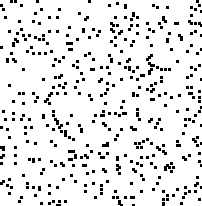

Ollama testing turn 7343
NO.
Testing ollama 7343 False


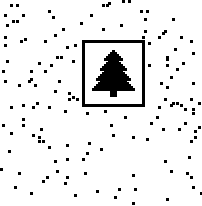

Ollama testing turn 7344
NO.
Testing ollama 7344 False


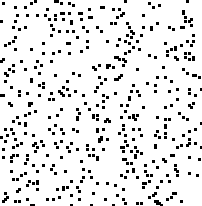

Ollama testing turn 7345
NO.
Testing ollama 7345 False


In [10]:

import ollama


def ollama_test(turn):
    positions = test_turn(turn, hailstones)
    save_grid(positions)
    # print("Saved image to image.jpg")
    # visualize_grid(positions)
    # print("Ollama testing turn", turn)
    response = ollama.chat(
        model='llama3.2-vision',
        options={'temperature': 0.1},
        messages=[{
            'role': 'user',
            'content': 'Does this image contain a drawing of a christmas tree? reply with a YES or NO',
            'images': ['image.jpg']
        }]
    )
    print(response.message.content)
    return True if "YES" in response.message.content.upper() else False


print("Testing ollama", 7343, ollama_test(7343))
print("Testing ollama", 7344, ollama_test(7344))
print("Testing ollama", 7345, ollama_test(7345))


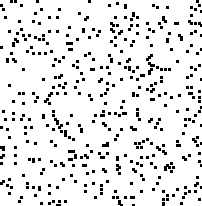

Ollama testing turn 7343
NO.
Previous Turn:  7343


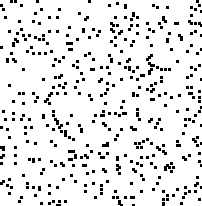

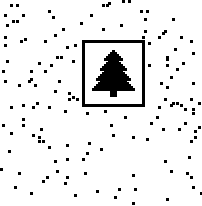

Ollama testing turn 7344
YES.
Found Christmas Tree!
7344


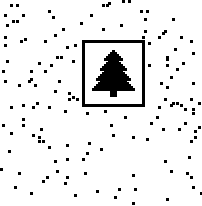

In [6]:
for turn in range(7343, 7350):
    if ollama_test(turn) == True:
        print("Found Christmas Tree!")
        # print(response.message.content)
        print(turn)
        visualize_grid(test_turn(turn, hailstones))
        break
    else:
        # clear_output(wait=False)
        print("Previous Turn: ", turn)
        # print("Response: ", response.message.content)
        visualize_grid(test_turn(turn, hailstones))
   